# Find complex roots

### Particle parameters

If particle dielectric then
$$
\varepsilon_{\text{in}} = \varepsilon_{\text{dielectric}}, \qquad \mu_{\text{in}} = \mu_{\text{dielectric}}
$$
If particle is metallic then
$$
\varepsilon_{\text{in}}(\omega) = \varepsilon_{\infty} - \frac{\omega_p^2}{\omega^2 + i \Gamma \omega}
$$
where parameters are taken for Gold from Novotny book p. 380: 
- $\varepsilon_\infty = 1$
- $\omega_p = 13.8 \cdot 10^{15} \text{ [1/s]}$
- $\Gamma = 1.075 \cdot 10^{14} \text{ [1/s]}$

### Dispersion equations

In compact form we can write them as
\begin{equation}
	\text{dispersion eq. for TE:} \qquad \frac{\mu_\text{in}}{\mu_\text{out}} \left( 1 + n_{\text{out}} z \frac{h_n^{(1)\prime} (n_{\text{out}} z)}{h_n^{(1)} (n_{\text{out}} z)}  \right) = 1 + n_\text{in} z \frac{j_n^\prime(n_\text{in} z)}{j_n (n_\text{in} z)}
\end{equation}
\begin{equation}
	\text{dispersion eq. for TM:} \qquad \frac{\varepsilon_\text{in}}{\varepsilon_\text{out}} \left( 1 + n_{\text{out}} z \frac{h_n^{(1)\prime} (n_{\text{out}} z)}{h_n^{(1)} (n_{\text{out}} z)}  \right) = 1 + n_\text{in} z \frac{j_n^\prime(n_\text{in} z)}{j_n (n_\text{in} z)}
\end{equation}
Here $z=k_0 a = \frac{\omega}{c} a \in \mathbb{Z}$ is the dimensionless **frequency**, and $n_{\text{in}} = \sqrt{\varepsilon_{\text{in}} \mu_{\text{in}}}$, $n_{\text{out}} = \sqrt{\varepsilon_{\text{out}} \mu_{\text{out}}}$. Prime shows the derivative with respect to the argument.

Which can be rewritten in a more sutable form for the numeric computation for TE modes
\begin{equation}
    f_{\text{TE}}(z) =  z \left( \frac{\mu_{\text{in}} }{\mu_{\text{out}}} n_{\text{out}} j_n h_n^\prime - n_{\text{in}} j_n^\prime h_n  \right)
    + h_n j_n \left( \frac{\mu_{\text{in}} }{\mu_{\text{out}}} - 1\right) = 0
\end{equation}
\begin{equation}
\frac{d}{dz}f_{\text{TE}}(z) = 
j_n h_n^\prime n_{\text{out}} \left( 2 \frac{\mu_{\text{in}} }{\mu_{\text{out}}} - 1\right)
+ j_n^\prime h_n n_{\text{in}} \left( \frac{\mu_{\text{in}} }{\mu_{\text{out}}} - 2\right)
+ z \left\{ j_n^\prime h_n^\prime n_{\text{out}} n_{\text{in}} \left( \frac{\mu_{\text{in}} }{\mu_{\text{out}}} - 1\right) 
+ \frac{\mu_{\text{in}} }{\mu_{\text{out}}} n_{\text{out}}^2 j_n h_n^{\prime \prime} - n_{\text{in}}^2 j_n^{\prime \prime} h_n \right\}
\end{equation}

and for TM
\begin{equation}
    f_{\text{TM}}(z) =  z \left( \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} n_{\text{out}} j_n h_n^\prime - n_{\text{in}} j_n^\prime h_n  \right)
    + h_n j_n \left( \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} - 1\right) = 0
\end{equation}
\begin{equation}
\frac{d}{dz}f_{\text{TM}}(z) = 
j_n h_n^\prime n_{\text{out}} \left( 2 \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} - 1\right)
+ j_n^\prime h_n n_{\text{in}} \left( \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} - 2\right)
+ z \left\{ j_n^\prime h_n^\prime n_{\text{out}} n_{\text{in}} \left( \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} - 1\right) 
+ \frac{\varepsilon_{\text{in}} }{\varepsilon_{\text{out}}} n_{\text{out}}^2 j_n h_n^{\prime \prime} - n_{\text{in}}^2 j_n^{\prime \prime} h_n \right\}
\end{equation}

In [4]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.angular_momenta import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
from icecream import ic
from itertools import cycle  # for this https://stackoverflow.com/questions/7799156/can-i-cycle-through-line-styles-in-matplotlib

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

# Dielectric

## TE

In [54]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

nmax = 10  # m = -n, ..., n

nSpace = np.arange(1, nmax+1)

a = 100*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

In [55]:
if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

### Roots

$$
\omega  = \frac{z c}{a}
$$
since $z = k_0 a = \frac{\omega}{c} a$.

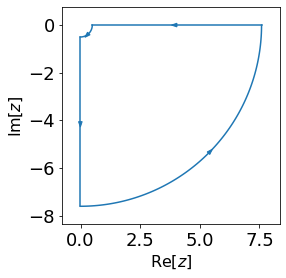

In [59]:
max_number_of_roots_per_n = 100
znSpace = np.zeros([nmax+1, max_number_of_roots_per_n], dtype=complex)

ABS_Z_MAX = 7.6

sector = AnnulusSector(
    center=-1e-2 - 1e-2j, radii=(0.5, ABS_Z_MAX), phiRange=(-np.pi/2, 0)
)
sector.show()

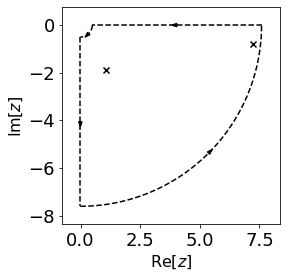

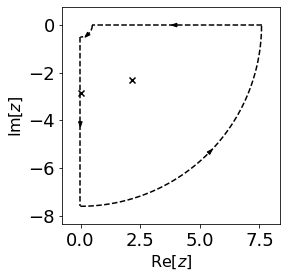

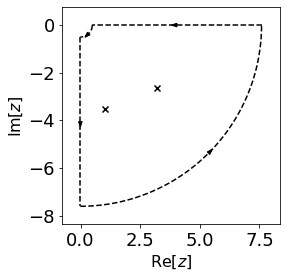

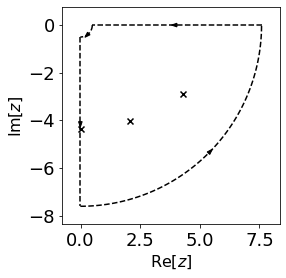

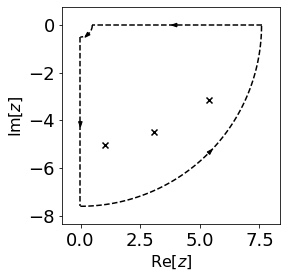

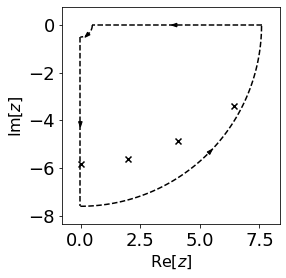

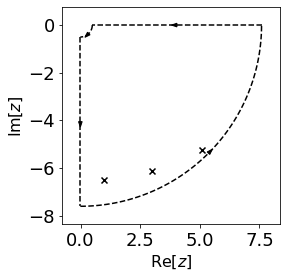

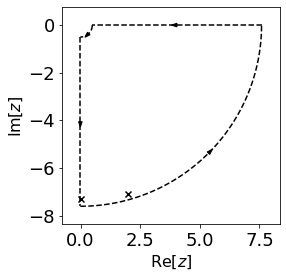

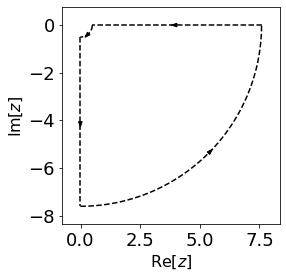

In [60]:
for n in nSpace:
    # Define f(z)
    f  = lambda z: foo_disp_nodiv(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric)      
    # Define f'(z)
    if particle_type == "dielectric":
        df = lambda z: foo_disp_nodiv_p(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric)         
    else:
        dz = 1e-8
        df = lambda z: (f(z+dz) - f(z-dz)) / (2*dz)

    
    roots = sector.roots(f, df)
    
    roots.show()

    # remember the roots
    zr = np.array(roots.roots)
    zr = np.sort(zr)
    znSpace[n,0:len(zr)] = zr 

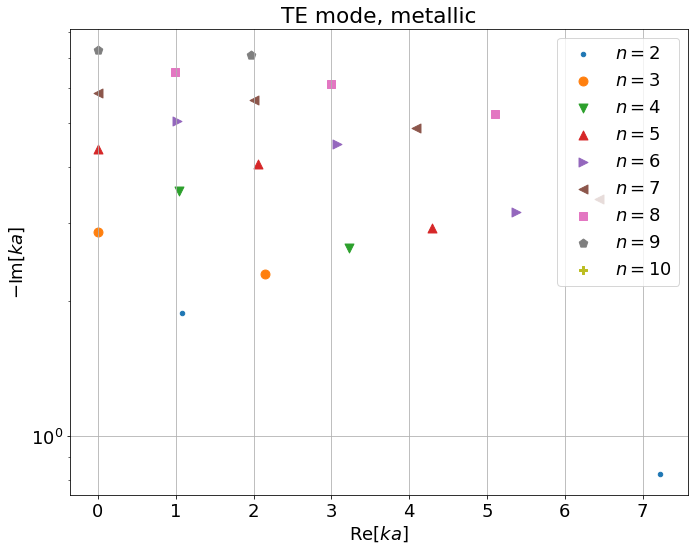

In [61]:
roots = znSpace
roots[roots == 0] = np.nan

# https://matplotlib.org/stable/api/markers_api.html
markers = [".","o","v","^",">","<","s","p","P","*","X","D","+","x"]
markercycler = cycle(markers)

plt.figure(figsize=(10, 8))
plt.title(mode_type + " mode, " + particle_type)

for n in nSpace:
    plt.scatter(
        np.real(roots[n, :]), -np.imag(roots[n, :]), 
        label="$n = {}$".format(n), s=80, marker=next(markercycler))
    
plt.xlabel("$\operatorname{Re}[k a]$")
plt.ylabel("$-\operatorname{Im}[k a]$")
plt.legend()
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.savefig("results/" + mode_type + "_mode_" + particle_type + ".pdf")
plt.show()

## TM

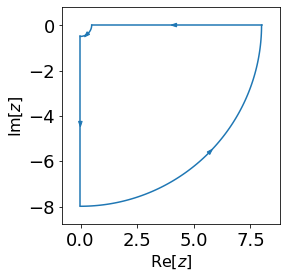

In [48]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

nmax = 10  # m = -n, ..., n

nSpace = np.arange(1, nmax+1)

a = 100*const.nano

mode_type = "TM"  # "TE" or "TM"

eps_out = 1
mu_out = 1

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp
    
    
max_number_of_roots_per_n = 100
znSpace = np.zeros([nmax+1, max_number_of_roots_per_n], dtype=complex)

ABS_Z_MAX = 8

sector = AnnulusSector(
    center=-1e-2 + 1e-2j, radii=(0.5, ABS_Z_MAX), phiRange=(-np.pi/2, 0)
)
sector.show()

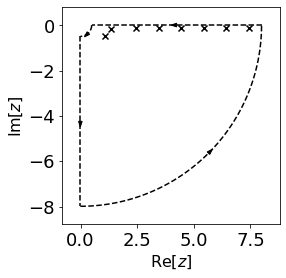

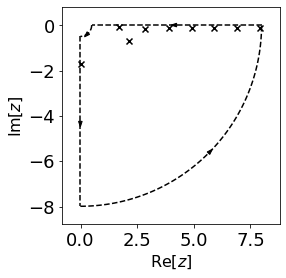

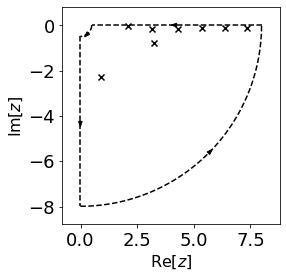

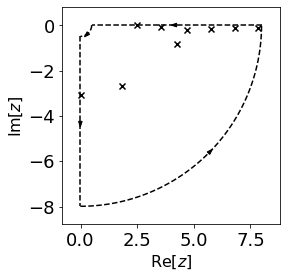

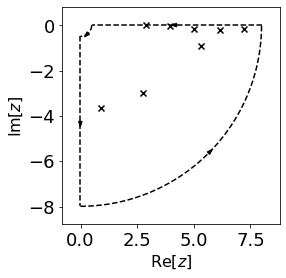

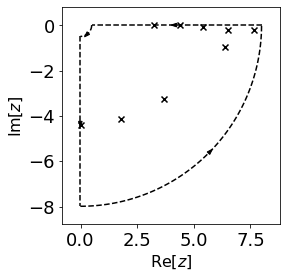

/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 0.901828 + -5.016146i has been recorded as a root of multiplicity 1.The error |f(z)| = 27500.121940916008
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \


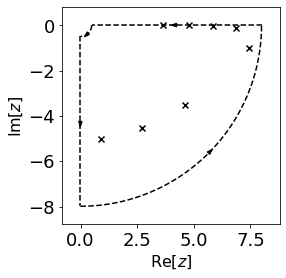

/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 3.614100 + -4.930248i has been recorded as a root of multiplicity 1.The error |f(z)| = 17777.562684945082
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 1.792057 + -5.542908i has been recorded as a root of multiplicity 1.The error |f(z)| = 106475.57090941795
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller tha

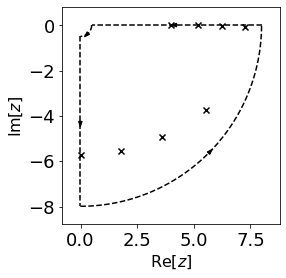

/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 4.521530 + -5.259435i has been recorded as a root of multiplicity 1.The error |f(z)| = 39784.22869464369
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 2.683518 + -6.009200i has been recorded as a root of multiplicity 1.The error |f(z)| = 353402.17804407555
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than

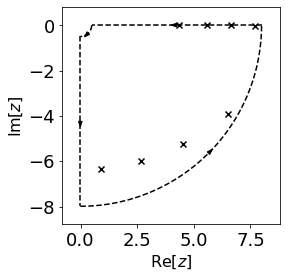

/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 5.432573 + -5.559396i has been recorded as a root of multiplicity 1.The error |f(z)| = 83181.86666351663
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTolThe point z = 3.577338 + -6.429656i has been recorded as a root of multiplicity 1.The error |f(z)| = 1045980.3671017423
  warnings.warn("The area of the interior of this contour with is smaller than newtonStepTol!  Try increasing rootTol" \
/home/ivan/.local/lib/python3.9/site-packages/cxroots/RootFinder.py:314: UserWarning: The area of the interior of this contour with is smaller than

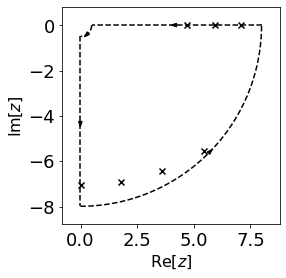

In [49]:
for n in nSpace:
    # Define f(z)
    f  = lambda z: foo_disp_nodiv(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric)      
    # Define f'(z)
    df = lambda z: foo_disp_nodiv_p(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric)         

    if particle_type == "dielectric":
        roots = sector.roots(f, df)
    else:
        roots = sector.roots(f)
    roots.show()

    # remember the roots
    zr = np.array(roots.roots)
    zr = np.sort(zr)
    znSpace[n,0:len(zr)] = zr 

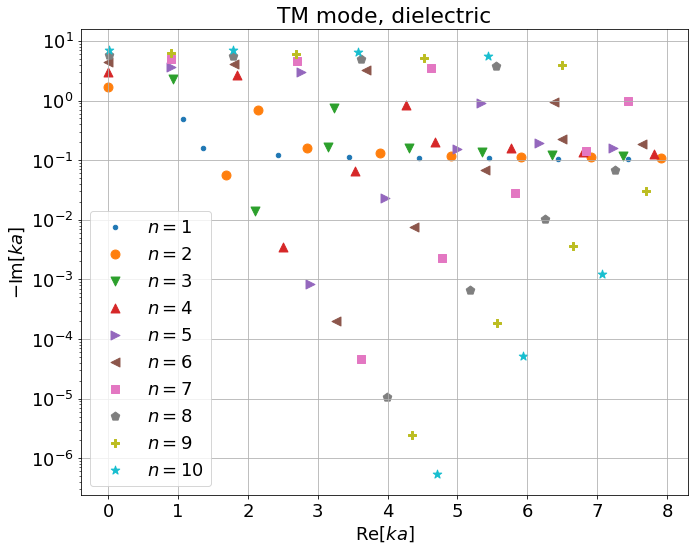

In [50]:
roots = znSpace
roots[roots == 0] = np.nan

# https://matplotlib.org/stable/api/markers_api.html
markers = [".","o","v","^",">","<","s","p","P","*","X","D","+","x"]
markercycler = cycle(markers)

plt.figure(figsize=(10, 8))
plt.title(mode_type + " mode, " + particle_type)

for n in nSpace:
    plt.scatter(
        np.real(roots[n, :]), -np.imag(roots[n, :]), 
        label="$n = {}$".format(n), s=80, marker=next(markercycler))
    
plt.xlabel("$\operatorname{Re}[k a]$")
plt.ylabel("$-\operatorname{Im}[k a]$")
plt.legend()
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.savefig("results/" + mode_type + "_mode_" + particle_type + ".pdf")
plt.show()

# Metallic

## TM

In [178]:
particle_type = "metallic"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 7 # m = -n, ..., n

a = 50*const.nano

mode_type = "TM"  # "TE" or "TM"

eps_out = 1
mu_out = 1

omega_p = 13.8e15  # [1/s]  plasma freq for Gold

ic(omega_p / const.speed_of_light * a)

ic| omega_p / const.speed_of_light * a: 2.3015922568672496


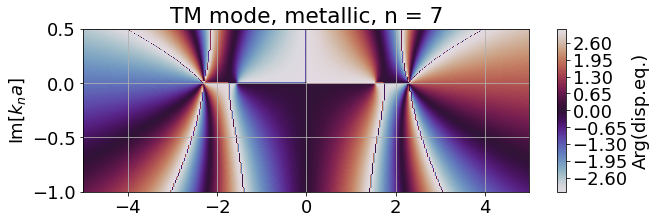

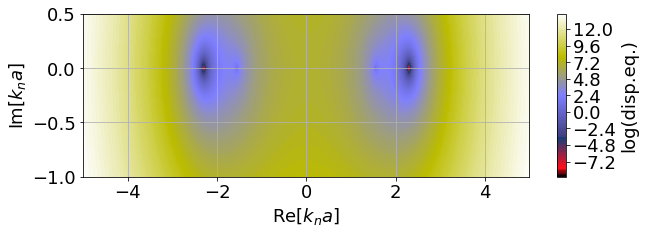

In [179]:
N = 300

z_re = np.linspace(-5, 5, num=N)
z_im = np.linspace(-1, 0.5, num=N)

X, Y = np.meshgrid(z_re, z_im, sparse=True)

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

weightOrder = 10
Z = foo_disp_nodiv(n, X + 1j*Y, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, ARG_Z, levels=150, cmap="twilight")
plt.colorbar(label="Arg(disp.eq.)")
plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=150, cmap="gist_stern")
plt.colorbar(label="log(disp.eq.)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

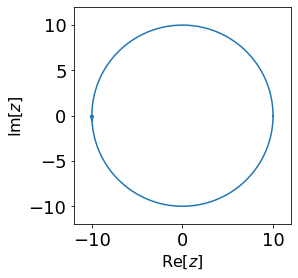

In [125]:
particle_type = "metallic"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

nmax = 10  # m = -n, ..., n

nSpace = np.arange(2, nmax+1)

a = 100*const.nano

mode_type = "TM"  # "TE" or "TM"

eps_out = 1
mu_out = 1

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp
    
    
max_number_of_roots_per_n = 100
znSpace = np.zeros([nmax+1, max_number_of_roots_per_n], dtype=complex)

ABS_Z_MAX = 8

#sector = AnnulusSector(
#    center=-1e-2 - 1e-3j, radii=(0.5, ABS_Z_MAX), phiRange=(-np.pi/2, 0)
#)
sector = Circle(0, 10)
sector.show()

In [75]:
for n in nSpace:
    # Define f(z)
    f  = lambda z: foo_disp_nodiv(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)      
    # Define f'(z)
    if particle_type == "dielectric":
        df = lambda z: foo_disp_nodiv_p(
        n, z, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)         
    else:
        dz = 1e-8
        df = lambda z: (f(z+dz) - f(z-dz)) / (2*dz)
    
    roots = sector.roots(f, df)
    roots.show()

    # remember the roots
    zr = np.array(roots.roots)
    zr = np.sort(zr)
    znSpace[n,0:len(zr)] = zr 

ValueError: negative dimensions are not allowed

In [ ]:
roots = znSpace
roots[roots == 0] = np.nan

# https://matplotlib.org/stable/api/markers_api.html
markers = [".","o","v","^",">","<","s","p","P","*","X","D","+","x"]
markercycler = cycle(markers)

plt.figure(figsize=(10, 8))
plt.title(mode_type + " mode, " + particle_type)

for n in nSpace:
    plt.scatter(
        np.real(roots[n, :]), -np.imag(roots[n, :]), 
        label="$n = {}$".format(n), s=80, marker=next(markercycler))
    
plt.xlabel("$\operatorname{Re}[k a]$")
plt.ylabel("$-\operatorname{Im}[k a]$")
plt.legend()
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.savefig("results/" + mode_type + "_mode_" + particle_type + ".pdf")
plt.show()

## TE

In [202]:
particle_type = "metallic"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 6 # m = -n, ..., n

a = 350*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

omega_p = 13.8e15  # [1/s]  plasma freq for Gold

ic(omega_p / const.speed_of_light * a)

ic| omega_p / const.speed_of_light * a: 16.111145798070748


/home/ivan/Documents/code/quant_sphere/src/dispersion.py:51: RuntimeWarning: divide by zero encountered in true_divide
  return eps_inf - omega_p**2 / (omega**2 + 1j * Gamma*omega)
/home/ivan/Documents/code/quant_sphere/src/dispersion.py:51: RuntimeWarning: invalid value encountered in true_divide
  return eps_inf - omega_p**2 / (omega**2 + 1j * Gamma*omega)
/home/ivan/Documents/code/quant_sphere/src/dispersion.py:68: RuntimeWarning: invalid value encountered in multiply
  n_in = np.sqrt(eps_in * mu_in)


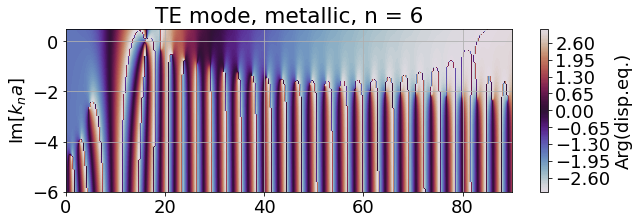

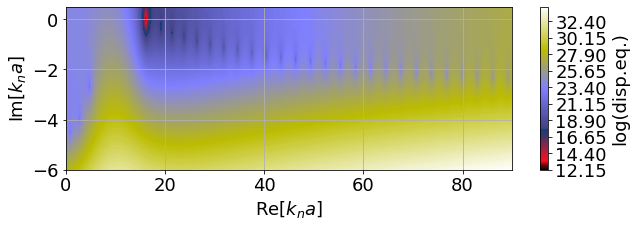

In [203]:
N = 300

z_re = np.linspace(-0, 90, num=N)
z_im = np.linspace(-6, 0.5, num=N)

X, Y = np.meshgrid(z_re, z_im, sparse=True)

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

weightOrder = n+1
Z = foo_disp_nodiv(n, X + 1j*Y, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, ARG_Z, levels=150, cmap="twilight")
plt.colorbar(label="Arg(disp.eq.)")
plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=150, cmap="gist_stern")
plt.colorbar(label="log(disp.eq.)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

## Mie coef

In [5]:
# electric Mie coefficent
def Mie_an(n, m, x, mu=1):
    """
    For detatails see Bohren p. 100
    
    Arguments:
        - `m = N1/N = n_p / n_m` : relative refractive index;
        - `x = n_m k0 a` : size parameter;
        - `n` : 2^n multipole order;
        - `mu = mu_p / mu_m` : relative magnetic permittivity
    """
    mx = m * x
    jnmx = sp.spherical_jn(n, mx)
    jnx = sp.spherical_jn(n, x)
    h1nx = spherical_h1(n, x)
    xjnx_p = jnx + x * sp.spherical_jn(n, x, 1)
    mxjnmx_p = jnmx + mx * sp.spherical_jn(n, mx, 1)
    xh1nx_p = h1nx + x * spherical_h1p(n, x)
    
    return (m**2 * jnmx * xjnx_p - mu * jnx * mxjnmx_p) / (m**2 * jnmx * xh1nx_p - mu * h1nx * mxjnmx_p)

# magnetic Mie coefficent
def Mie_bn(n, m, x, mu=1):
    """
    For detatails see Bohren p. 100
    
    Arguments:
        - `m = N1 / N = n_p / n_m` : relative refractive index;
        - `x = n_m k0 a` : size parameter;
        - `n` : 2^n multipole order;
        - `mu = mu1 / mu =  mu_p / mu_m` : relative magnetic permittivity
    """
    mx = m * x
    jnmx = sp.spherical_jn(n, mx)
    jnx = sp.spherical_jn(n, x)
    h1nx = spherical_h1(n, x)
    xjnx_p = jnx + x * sp.spherical_jn(n, x, 1)
    mxjnmx_p = jnmx + mx * sp.spherical_jn(n, mx, 1)
    xh1nx_p = h1nx + x * spherical_h1p(n, x)

    return (mu * jnmx * xjnx_p - jnx * mxjnmx_p) / (mu * jnmx * xh1nx_p - h1nx * mxjnmx_p)

In [13]:
particle_type = "metallic"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1 # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

omega_p = 13.8e15  # [1/s]  plasma freq for Gold

ic(omega_p / const.speed_of_light * a)

ic| omega_p / const.speed_of_light * a: 2.3015922568672496


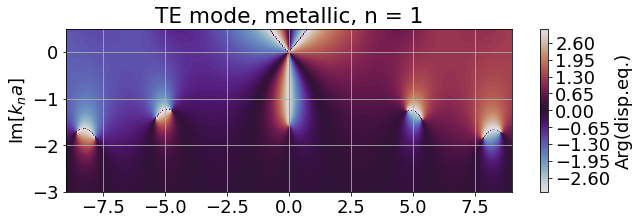

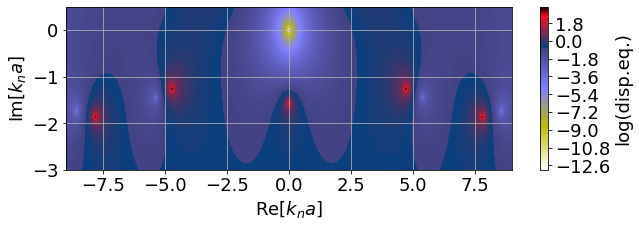

In [27]:
N = 300

z_re = np.linspace(-9, 9, num=N)
z_im = np.linspace(-3, 0.5, num=N)

X, Y = np.meshgrid(z_re, z_im, sparse=True)


omega = const.speed_of_light / a * (X + 1j*Y)
relN = np.sqrt( eps_in_func(omega, particle_type, eps_dielectric) * mu_dielectric / (eps_out * mu_out))
x = np.sqrt(eps_out*mu_out) * (X + 1j*Y)

if mode_type == "TE":
    foo_disp_nodiv = fTE
    foo_disp_nodiv_p = fTEp
elif mode_type == "TM":
    foo_disp_nodiv = fTM
    foo_disp_nodiv_p = fTMp

Z = Mie_bn(n, relN, x, mu=mu_dielectric/mu_out)
#Z = Mie_an(n, relN, x, mu=mu_dielectric/mu_out)
#weightOrder = n + 1
#Z = foo_disp_nodiv(n, X + 1j*Y, a, eps_out, mu_out, particle_type, eps_dielectric, mu_dielectric, weightOrder=weightOrder)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, ARG_Z, levels=150, cmap="twilight")
plt.colorbar(label="Arg(disp.eq.)")
plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=150, cmap="gist_stern_r")
plt.colorbar(label="log(disp.eq.)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[k_n a]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()